# Random blocks



Square blocks are dropped into a grid, similar to the game
[Connect 4](https://en.wikipedia.org/wiki/Connect_Four).

 
A block starts in some column and 
falls vertically stopping :

- on another block already on the grid
- next to another block already on the grid
- on the bottom of the grid.

so it stops as soon as one of the folowing conditions is satisfied:
- there is a block directly below it
- there is a block on the left or right
- it reaches the bottom of the grid.


So major difference with the game **Connect 4**, 
is that our blocks are “sticky”, 
i.e. a block will stop
as soon as it meets a neighbor on the left or the right.

![img](coral.png)

source : [Python in High School](https://www.amazon.com/Python-High-School-Algorithms-Mathematics/dp/B085RQRSHL)


In [14]:
import numpy as np
import matplotlib.pyplot as plt

## make an empty grid

In [13]:
X = np.zeros((10,10), dtype=np.int8)
print(X)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


## fill in some cells with 1s

In [20]:
X[0,5] = 1
X[-1,:] = 1
print(X)

[[0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]]


## writing a function

I started writing a function to implement the stopping conditions

the blocks stops :
1. on the bottom of the grid
1. on another block already on the grid
1. next to another block already on the grid.

but I decided to do it using just numpy operations

In [15]:
def to_chk(x):
    if 1 < x < 10: 
        rr = [x - 1 , x, x + 1]
    if x == 0: 
        rr = [0, 1]
    if x == 10: 
        rr = [9,10]
    rr.extend([x + 10 for x in rr])
    return rr
    

## Tricks

In programming there always **tricks**.

A programmer/mathematician must always 
thinks about how to represent the data first.
The way it is represented must make the implementation 
as elegant as possible.

### Representing the grid

1. fill the bottom row with blocks
1. blocks don't drop in the first and last columns

this makes the effective size of the grid smaller 
but makes the program easier to implement.

### Pulling out a subgrid

We don't actually have to look 
at the **whole** grid to find
the resting place of the block.
To verify the three conditions 
we only have to look at 
 three columns from the grid

1. the one under the block
1. the one to the left of the block
1. the one to the right 

So let's make a copy of them:
if 0<x is the column number for the block then



In [19]:
U = grid[:, x-1: x+2]

NameError: name 'grid' is not defined

The middle column is special: if there
is a block in it we have to stop before we hit it.
If we shift the values in this column up one place
then the stopping condition becomes symmetric.

I actually take a transpose before shifting it 
so that the column becomes a row.

In [17]:
U = U.T 
U[1] = np.roll(U[1], -1)   

NameError: name 'U' is not defined

now we look for the index of  the first non zero element in each row

In [18]:
ys, xs = np.where(U > 0)

NameError: name 'U' is not defined

In [21]:
def find_stop(x, grid): 
    #make a copy of the 3 cols
    U = np.copy( grid[:, x-1: x+2])
    # don't need to do this but easier to think this way
    U = U.T
    # the middle col moves up 1 
    U[1] = np.roll(U[1], -1)   
    ys, xs = np.where(U > 0)
    return min(xs)

def grid2im(grid):
    return np.stack((1 - grid.astype(np.float).T,)*3).T


def mk_shape(size=30,
             num_blocks=30*30//3,
             anim=False):

    grid = np.zeros((size, size), dtype=np.int8)
    grid[-1:] = 1 # last line is all 1
    
    frames = []
    for k in range(num_blocks):
        x = np.random.randint(1, high=size-1)  
        grid[ find_stop(x, grid), x] = 1
        if anim : frames.append(np.copy(grid))
    
    if anim: return frames
    return grid
    



## Let's test it

works ok but not very nice looking at all those numbers is it?

In [22]:
print(mk_shape(size=20))

[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0]
 [0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0]
 [0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0]
 [0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0]
 [0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0]
 [0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0]
 [0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0]
 [0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0]
 [0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0]
 [0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0]
 [0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0]
 [0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0]
 [0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0]
 [0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0]
 [0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0]
 [0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0]
 [0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


## There must be a better way

or so says [Hettinger](http://dc20011.blogspot.com/2019/06/there-must-be-better-way.html).

We can use [matplotlib](https://matplotlib.org/) to make things look better

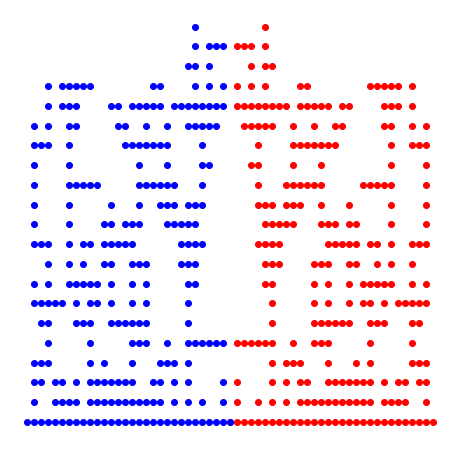

In [23]:
X, Y  = np.where( mk_shape(size=30, num_blocks=30**2//4) > 0)

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)

ax.plot(Y, -X,'ro')
ax.plot(-Y, -X,'bo'); # symmetric copy (rorschach)

plt.axis('off');

## there must be an even better way...

why not take make an image like a **jpg/png/gif** ?

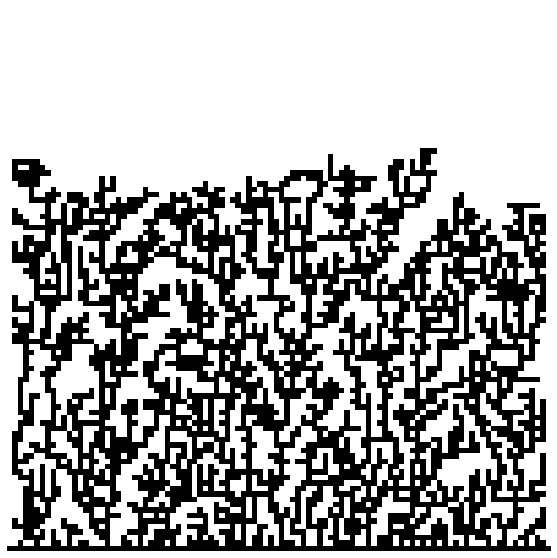

In [24]:

N = 100
grid = mk_shape(size=N, 
                num_blocks=N**2//3)

# rgb layers are copies
image = np.stack((1 - grid.astype(np.float).T,)*3).T

fig, ax = plt.subplots()
fig.set_size_inches(10,10)

ax.imshow(image) #; kills a stupid message
plt.axis('off');



In [27]:
# doing grid2im here saves some space
imgs = [ grid2im(x[1:-1,:-1]) 
             for x in mk_shape(size=25, num_blocks=200, anim=True)]

In [15]:
import numpy as np
import matplotlib.pyplot as plt

import  matplotlib.animation

from matplotlib import animation

from IPython.display import HTML
%matplotlib inline

In [17]:
#frames = imgs

def plot_images(img_list):
  def init():
    img.set_data(img_list[0])
    return (img,)

  def animate(i):
    img.set_data(img_list[i])
    return (img,)

  fig = plt.figure()
  ax = fig.gca()
  plt.axis('off')
  img = ax.imshow(img_list[0])

  anim = animation.FuncAnimation(fig, animate, 
                                 init_func=init,
                                 frames=len(img_list), 
                                 interval=200, 
                                 blit=True)
  return anim

#HTML(plot_images(imgs).to_html5_video())

In [30]:
#upload to github
! ../.g


[master 8e9f39c] web
 2 files changed, 417 insertions(+), 59 deletions(-)
Counting objects: 13, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (13/13), done.
Writing objects: 100% (13/13), 69.22 KiB | 5.77 MiB/s, done.
Total 13 (delta 8), reused 0 (delta 0)
remote: Resolving deltas: 100% (8/8), completed with 5 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   a5c128c..8e9f39c  master -> master


https://nicholasrui.com/2017/12/18/convolutions-and-the-game-of-life/#:~:text=The%20Game%20of%20Life%20is,its%20neighbors%20must%20be%20alive.

In [3]:
import numpy as np

In [4]:
G = np.zeros(100)
G.reshape((10,10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [5]:
G = np.random.randint(0,high=2, size=(10,10))
G

array([[1, 0, 1, 0, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [0, 1, 1, 0, 0, 1, 0, 0, 0, 1],
       [1, 1, 1, 0, 1, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [1, 0, 1, 0, 1, 1, 1, 1, 0, 0],
       [0, 1, 0, 1, 1, 0, 0, 1, 1, 1],
       [1, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 1, 1, 1, 1]])

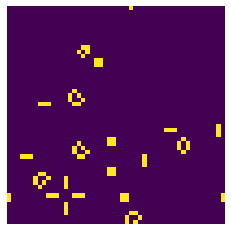

In [22]:
from scipy import signal
G = np.zeros((20,20), dtype=np.int0)
#G[3,4:7] = 1
#G[3:5,3:5] = 1
#G[3,4:7] = 1
#G[4,5:8] = 1

G[4,5:8] = 1
G[3,7] = 1
G[2,6] = 1

# noyau
K = np.ones((3,3), dtype=np.int8)
G = np.random.randint(0, high=2, size=(50,50))
frames = []
for k in range(1000):
    H = signal.convolve2d( G, K, boundary='wrap')[1:-1,1:-1]

    H[H<=2] = 0
    H[(H==4)&(G==0)] = 0
    H[H>4] = 0
    H[H>0] = 1
    G = H
    frames.append(np.copy(G))

HTML(plot_images(frames).to_html5_video())

In [11]:
image = np.stack((1 - H.astype(np.float).T,)*3).T

fig, ax = plt.subplots()
fig.set_size_inches(10,10)

ax.imshow(image) #; kills a stupid message
plt.axis('off');

NameError: name 'H' is not defined

In [7]:
K = np.ones((3,3), dtype=np.int8)
#K[1,1] = 0
K

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=int8)

In [82]:
signal.convolve2d( np.diag([1,2,3,4,3,2,1]) , K, boundary='wrap')[1:-1,1:-1]


array([[3, 3, 2, 0, 0, 1, 2],
       [3, 4, 5, 3, 0, 0, 1],
       [2, 5, 6, 7, 4, 0, 0],
       [0, 3, 7, 6, 7, 3, 0],
       [0, 0, 4, 7, 6, 5, 2],
       [1, 0, 0, 3, 5, 4, 3],
       [2, 1, 0, 0, 2, 3, 3]])

In [77]:
np.diag([1,2,3,4])

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [2]:
dir(this)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'c',
 'd',
 'i',
 's']

In [7]:
this.__file__

'/home/gregmcshane/anaconda3/lib/python3.6/this.py'

In [8]:
with open('/home/gregmcshane/anaconda3/lib/python3.6/this.py','r') as fp:
    dd = fp.read()

In [10]:
print(dd)

s = """Gur Mra bs Clguba, ol Gvz Crgref

Ornhgvshy vf orggre guna htyl.
Rkcyvpvg vf orggre guna vzcyvpvg.
Fvzcyr vf orggre guna pbzcyrk.
Pbzcyrk vf orggre guna pbzcyvpngrq.
Syng vf orggre guna arfgrq.
Fcnefr vf orggre guna qrafr.
Ernqnovyvgl pbhagf.
Fcrpvny pnfrf nera'g fcrpvny rabhtu gb oernx gur ehyrf.
Nygubhtu cenpgvpnyvgl orngf chevgl.
Reebef fubhyq arire cnff fvyragyl.
Hayrff rkcyvpvgyl fvyraprq.
Va gur snpr bs nzovthvgl, ershfr gur grzcgngvba gb thrff.
Gurer fubhyq or bar-- naq cersrenoyl bayl bar --boivbhf jnl gb qb vg.
Nygubhtu gung jnl znl abg or boivbhf ng svefg hayrff lbh'er Qhgpu.
Abj vf orggre guna arire.
Nygubhtu arire vf bsgra orggre guna *evtug* abj.
Vs gur vzcyrzragngvba vf uneq gb rkcynva, vg'f n onq vqrn.
Vs gur vzcyrzragngvba vf rnfl gb rkcynva, vg znl or n tbbq vqrn.
Anzrfcnprf ner bar ubaxvat terng vqrn -- yrg'f qb zber bs gubfr!"""

d = {}
for c in (65, 97):
    for i in range(26):
        d[chr(i+c)] = chr((i+13) % 26 + c)

print("".join([d.get(c, c) for c in s]

In [13]:
from googletrans import Translator

ModuleNotFoundError: No module named 'googletrans'

In [7]:
pwd

'/home/gregmcshane/PROGRAMMATION'